In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('dataset/Social_Network_Ads.csv')

df.sample(10)

,Age,EstimatedSalary,Purchased
361,53,34000,1
280,59,88000,1
58,22,18000,0
144,34,25000,0
51,18,44000,0
4,19,76000,0
158,26,30000,0
315,39,75000,1
134,28,55000,0
114,42,80000,0


# Train Test Split

In [3]:
from sklearn.model_selection import train_test_split

[X_train,X_test,y_train,y_test]=train_test_split(df.drop(('Purchased'),axis=1),
                                                    df['Purchased'] ,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape,df.shape

((280, 2), (400, 3))

# Srandard Scaler

In [4]:
from sklearn.preprocessing import StandardScaler 

scaler= StandardScaler()


# learn the parameters
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [5]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

# Transform the data frames

In [6]:
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled


array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [7]:
X_train_scaled= pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled,columns=X_test.columns)

X_test_scaled
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [8]:
import numpy as np

np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Visualization

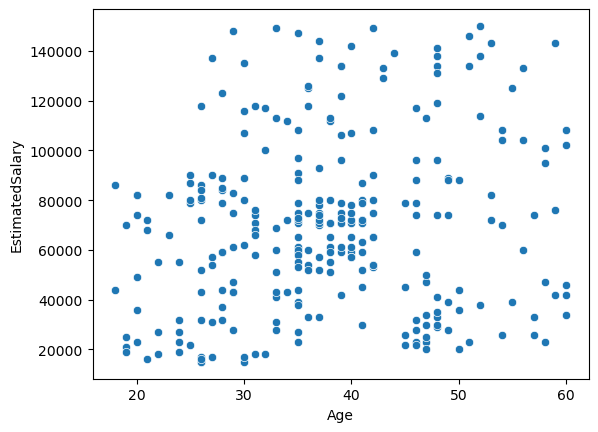

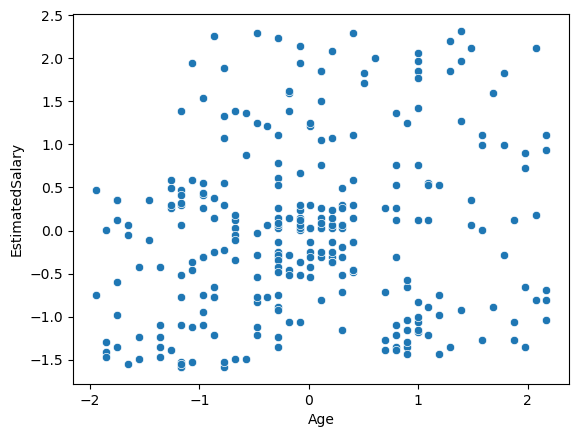

In [9]:
sns.scatterplot(x=X_train.Age,y=X_train.EstimatedSalary)
plt.show()
sns.scatterplot(x=X_train_scaled.Age,y=X_train_scaled.EstimatedSalary)
plt.show()

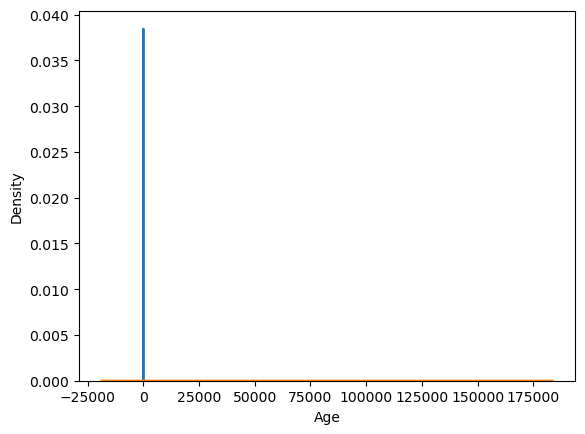

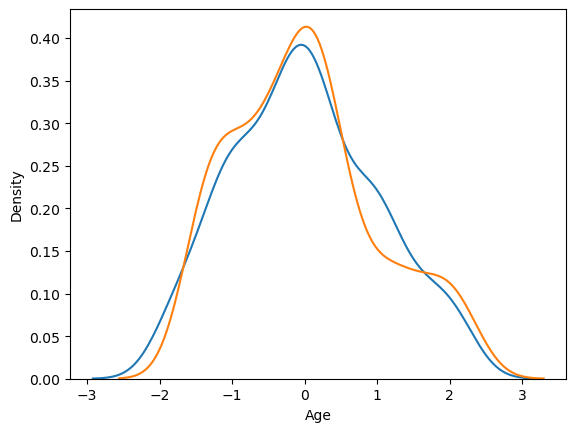

In [10]:
sns.kdeplot(x=X_train.Age)
sns.kdeplot(x=X_train.EstimatedSalary)

plt.show()

sns.kdeplot(x=X_train_scaled.Age)
sns.kdeplot(x=X_train_scaled.EstimatedSalary)
plt.show()

# Model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr= LogisticRegression()
lr_scaled= LogisticRegression()

In [13]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred = lr.predict(X_test)
y_pred_scaled =lr_scaled.predict(X_test_scaled)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
